# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [42]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


In [43]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np



## Get the list of stocks in the S&P 500

In [44]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [45]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [46]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [47]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [48]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)

df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
display(df_close)

/tmp/ipython-input-48-132222642.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376282,168.283661,154.714783,156.160004,103.735458,91.096085,293.442108,469.390015,189.859940,55.668903,...,29.172791,91.453209,51.484386,111.217087,129.094391,66.839996,132.078339,118.202553,309.049988,156.223282
2024-05-02,136.217361,171.991272,153.844193,158.330002,103.374336,90.497009,295.092743,476.570007,192.405914,56.603554,...,29.955240,93.958229,51.493961,111.418365,134.052750,70.300003,131.824631,117.115036,312.709991,164.827881
2024-05-03,138.129074,182.279160,156.695114,159.710007,103.354828,89.774330,298.403870,486.179993,195.480637,56.431889,...,30.032518,95.378410,51.934326,111.188332,135.255371,69.470001,131.112122,120.278709,309.589996,164.670181
2024-05-06,139.278076,180.619171,155.681015,162.000000,103.101074,92.370285,300.712830,493.589996,199.093948,57.404686,...,30.022860,96.522430,52.039635,111.907227,137.217010,73.529999,132.907913,119.191193,315.790009,163.566254
2024-05-07,139.931839,181.305023,155.508820,159.809998,103.618332,93.387741,305.232452,492.269989,199.338745,58.739899,...,29.800682,95.891251,52.671455,111.351280,138.035187,71.599998,132.644409,120.051315,317.869995,166.030365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [49]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)

df_ma50 = df_close.rolling(window=50).mean()
df_ma200 = df_close.rolling(window=200).mean()
print("Displaying 50-days moving average:")
display(df_ma50)
print("Displaying 200-days moving average:")
display(df_ma200)

Displaying 50-days moving average:


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,118.589774,219.229514,194.882049,128.497001,129.695852,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290148,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931156
2025-04-25,117.960953,218.678437,194.779480,128.136801,129.675178,91.7690,320.885378,399.492000,204.194041,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535974
2025-04-28,117.376369,218.051459,194.792595,127.782001,129.642279,91.7896,318.998219,397.680000,203.901112,46.480951,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320587


Displaying 200-days moving average:


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.080366,227.101212,183.261853,130.701575,116.973860,96.197872,340.475853,478.509449,214.891999,52.358255,...,29.730782,85.165791,64.041626,111.437774,125.549300,72.28710,136.723923,106.728763,346.199799,172.881444
2025-04-25,132.988337,227.008164,183.380334,130.551875,117.119245,96.185332,340.478540,477.517949,214.720083,52.293548,...,29.719768,85.156248,64.130068,111.439661,125.467795,72.25500,136.835707,106.711042,345.854800,172.787550
2025-04-28,132.891064,226.898010,183.529515,130.409175,117.261134,96.177719,340.493398,476.538299,214.512770,52.222563,...,29.712475,85.151355,64.220807,111.437109,125.371803,72.22490,136.937422,106.688920,345.453200,172.697852


### Detecting Golden and Death Crosses in the last 14 days

In [50]:
# CODE HERE
# Use as many coding cells as you need

# define a function that detects golden and death crosses in the last 14 days for all stocks

def detect_crosses(df_close, df_ma50, df_ma200, days=14):
    golden_crosses = {}
    death_crosses = {}

    end_date = df_close.index.max()
    start_date_filter = end_date - pd.Timedelta(days=days)

    for ticker in df_close.columns:
        golden_cross_dates = df_close[(df_ma50[ticker].shift(1) <= df_ma200[ticker].shift(1))
        & (df_ma50[ticker] > df_ma200[ticker])].index.tolist()

        death_cross_dates = df_close[(df_ma50[ticker].shift(1) >= df_ma200[ticker].shift(1))
        & (df_ma50[ticker] < df_ma200[ticker])].index.tolist()

        # Filter dates to be within the last '14 days' from the end date
        recent_golden_cross_dates = [date for date in golden_cross_dates if date >= start_date_filter
                                     and date <= end_date]
        recent_death_cross_dates = [date for date in death_cross_dates if date >= start_date_filter
                                    and date <= end_date]

        if recent_golden_cross_dates:
            golden_crosses[ticker] = recent_golden_cross_dates
        if recent_death_cross_dates:
            death_crosses[ticker] = recent_death_cross_dates

    return golden_crosses, death_crosses

df_golden_cross_14d, df_death_cross_14d = detect_crosses(df_close, df_ma50, df_ma200, days=14)

In [51]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)
print(f"Quantity of tickers with golden cross: {len(df_golden_cross_14d)}")
display(df_golden_cross_14d)

Quantity of tickers with golden cross: 9


{'AMT': [Timestamp('2025-04-21 00:00:00')],
 'CI': [Timestamp('2025-04-30 00:00:00')],
 'EW': [Timestamp('2025-04-17 00:00:00')],
 'INVH': [Timestamp('2025-04-30 00:00:00')],
 'KDP': [Timestamp('2025-04-21 00:00:00')],
 'MDLZ': [Timestamp('2025-04-28 00:00:00')],
 'MOH': [Timestamp('2025-04-28 00:00:00')],
 'SBAC': [Timestamp('2025-04-29 00:00:00')],
 'SJM': [Timestamp('2025-04-25 00:00:00')]}

In [52]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)
print(f"Quantity of tickers with death cross: {len(df_death_cross_14d)}")
display(df_death_cross_14d)


Quantity of tickers with death cross: 42


{'AME': [Timestamp('2025-04-22 00:00:00')],
 'AMP': [Timestamp('2025-04-24 00:00:00')],
 'AMZN': [Timestamp('2025-04-22 00:00:00')],
 'APD': [Timestamp('2025-04-21 00:00:00')],
 'APO': [Timestamp('2025-04-17 00:00:00')],
 'AXP': [Timestamp('2025-04-22 00:00:00')],
 'BAC': [Timestamp('2025-04-16 00:00:00')],
 'BLK': [Timestamp('2025-04-16 00:00:00')],
 'CCL': [Timestamp('2025-04-22 00:00:00')],
 'CEG': [Timestamp('2025-04-22 00:00:00')],
 'CMI': [Timestamp('2025-04-23 00:00:00')],
 'CTSH': [Timestamp('2025-04-30 00:00:00')],
 'D': [Timestamp('2025-04-23 00:00:00')],
 'DIS': [Timestamp('2025-04-22 00:00:00')],
 'FTV': [Timestamp('2025-04-16 00:00:00')],
 'GDDY': [Timestamp('2025-04-28 00:00:00')],
 'GLW': [Timestamp('2025-04-30 00:00:00')],
 'HLT': [Timestamp('2025-04-25 00:00:00')],
 'HSIC': [Timestamp('2025-04-21 00:00:00')],
 'IP': [Timestamp('2025-04-30 00:00:00')],
 'KEYS': [Timestamp('2025-04-22 00:00:00')],
 'LULU': [Timestamp('2025-04-25 00:00:00')],
 'LUV': [Timestamp('2025-04-2

#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [53]:
golden_cross_tickers = sorted(df_golden_cross_14d.keys())
print("Companies with Golden Crosses in the last 14 days (alphabetical order):")
for ticker in golden_cross_tickers[:10]:
    print(ticker)

Companies with Golden Crosses in the last 14 days (alphabetical order):
AMT
CI
EW
INVH
KDP
MDLZ
MOH
SBAC
SJM


*   AMT
*   CI
*   EW
*   INVH
*   KDP
*   MDLZ
*   MOH
*   SBAC
*   SJM


#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

In [54]:
death_cross_tickers = sorted(df_death_cross_14d.keys())
print("Companies with Death Crosses in the last 14 days (alphabetical order):")
for ticker in death_cross_tickers[:10]:
    print(ticker)

Companies with Death Crosses in the last 14 days (alphabetical order):
AME
AMP
AMZN
APD
APO
AXP
BAC
BLK
CCL
CEG


YOUR WRITTEN RESPONSE HERE

*   AME
*   AMP
*   AMZN
*   APD
*   APO
*   AXP
*   BAC
*   BLK
*   CCL
*   CEG

### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot

In [55]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500
daily_returns = df_close.pct_change()
volatility = daily_returns.std()
display(volatility)

/tmp/ipython-input-55-1500681745.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df_close.pct_change()


,0
Ticker,
A,0.018595
AAPL,0.020583
ABBV,0.017048
ABNB,0.026069
ABT,0.012995
...,...
XYZ,0.031373
YUM,0.013943
ZBH,0.014686


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

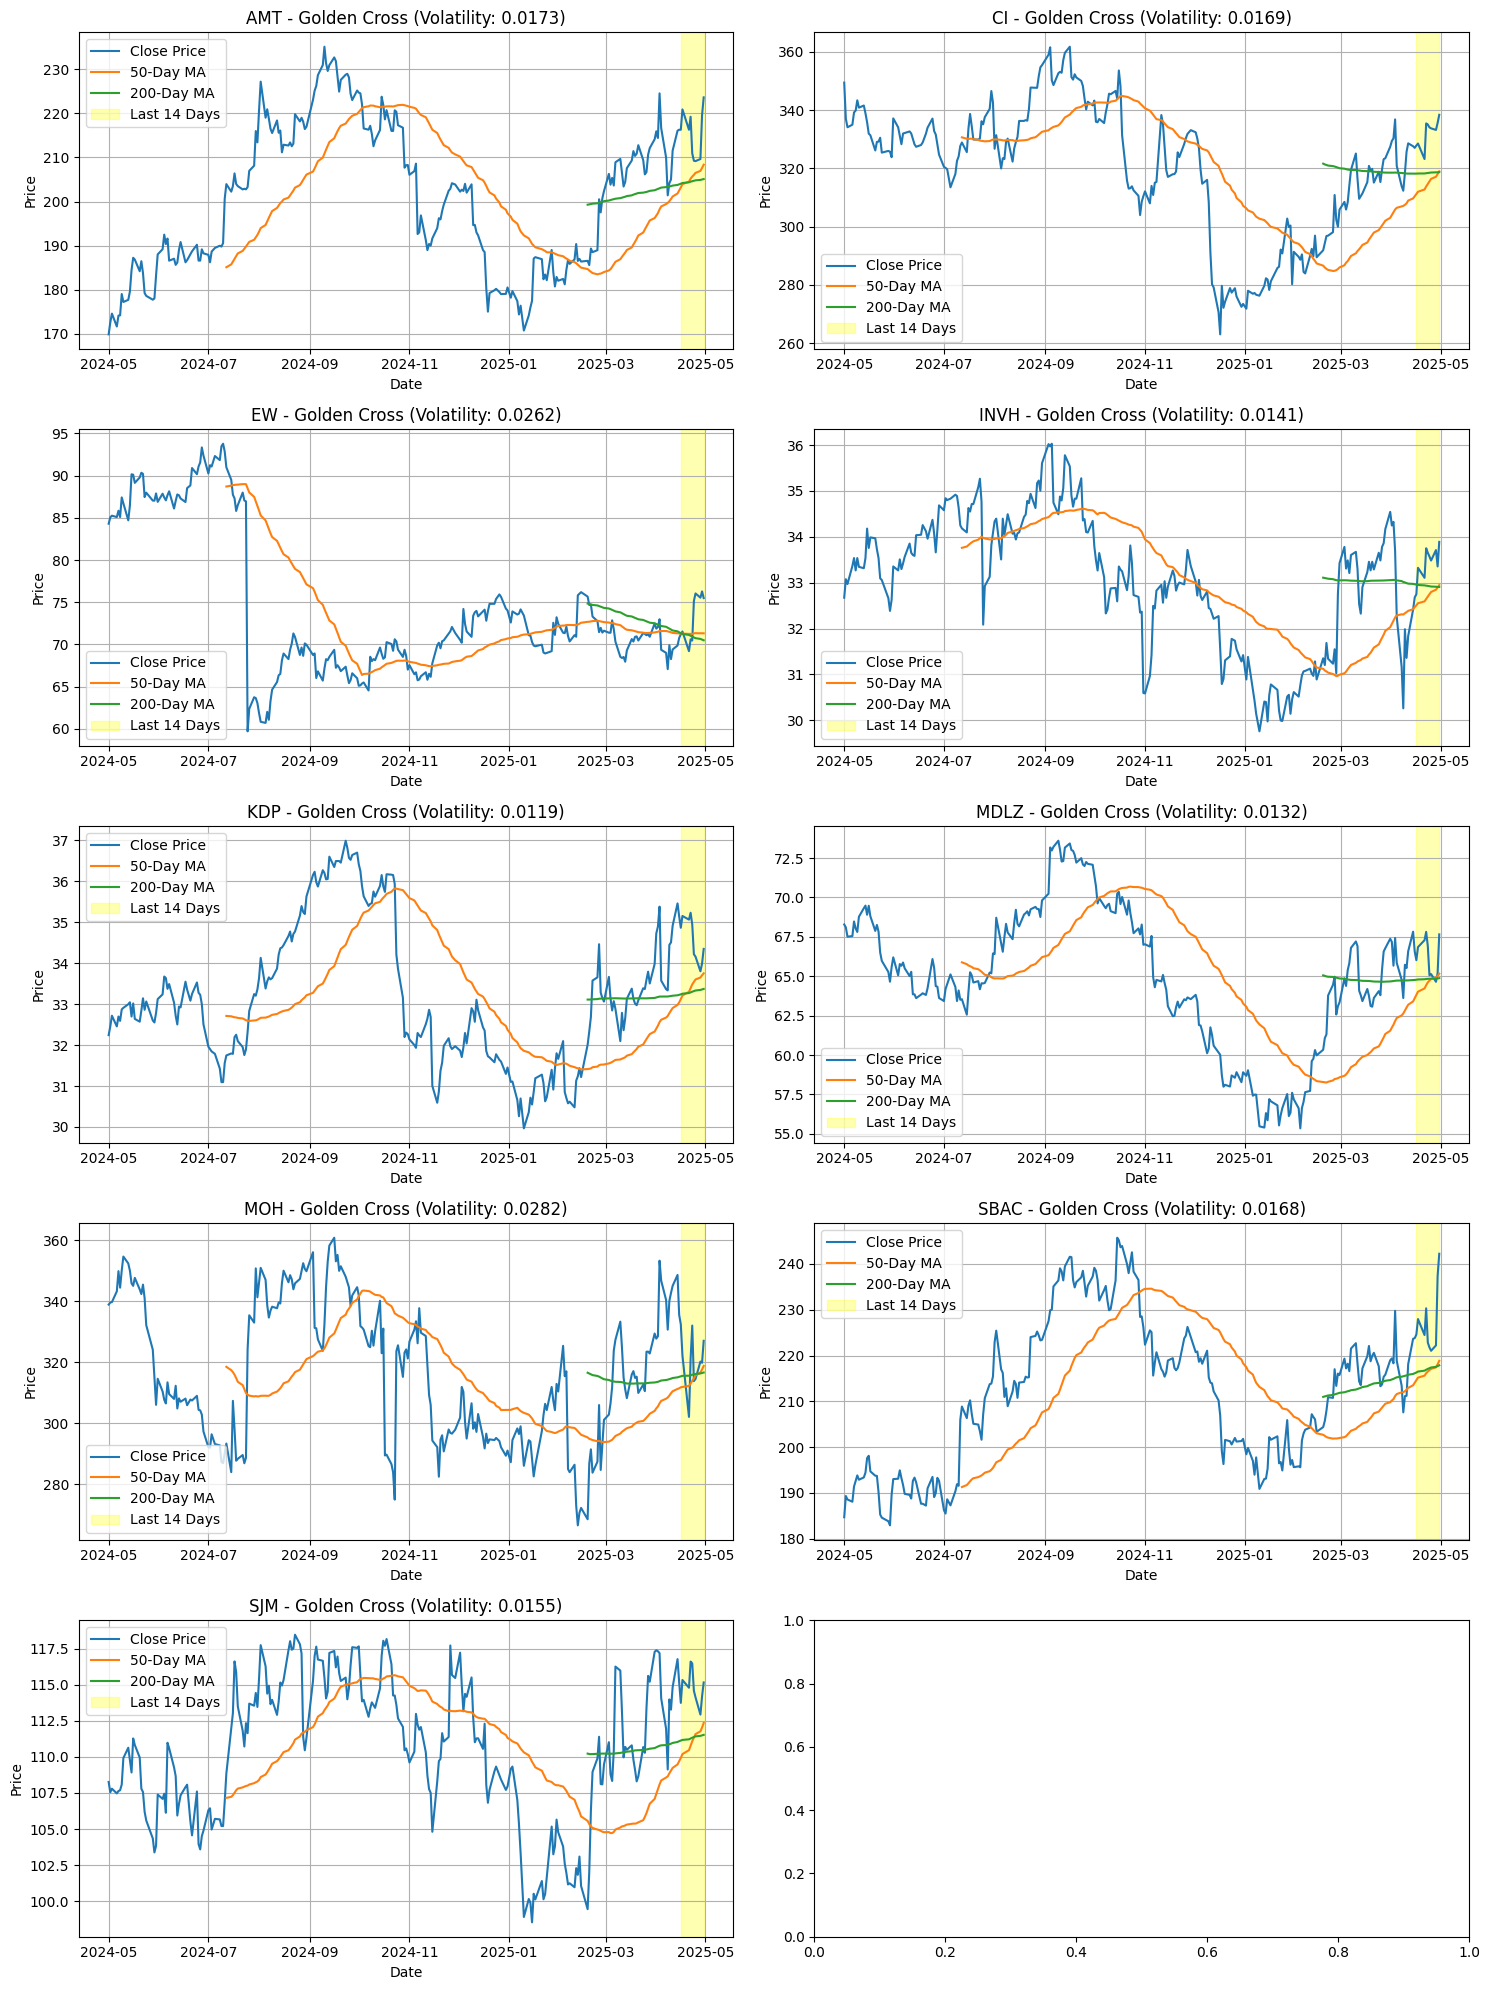

In [56]:
# CODE HERE
# Visualize the results here
golden_cross_tickers = sorted(df_golden_cross_14d.keys())[:10]

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, ticker in enumerate(golden_cross_tickers):
    axes[i].plot(df_close[ticker], label='Close Price')
    axes[i].plot(df_ma50[ticker], label='50-Day MA')
    axes[i].plot(df_ma200[ticker], label='200-Day MA')
    axes[i].set_title(f'{ticker} - Golden Cross (Volatility: {volatility[ticker]:.4f})')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].grid(True)
    # Shade the last 14 days
    end_shade_date = df_close.index.max()
    start_shade_date = end_shade_date - pd.Timedelta(days=14)
    axes[i].axvspan(start_shade_date, end_shade_date, color='yellow', alpha=0.3, label='Last 14 Days')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

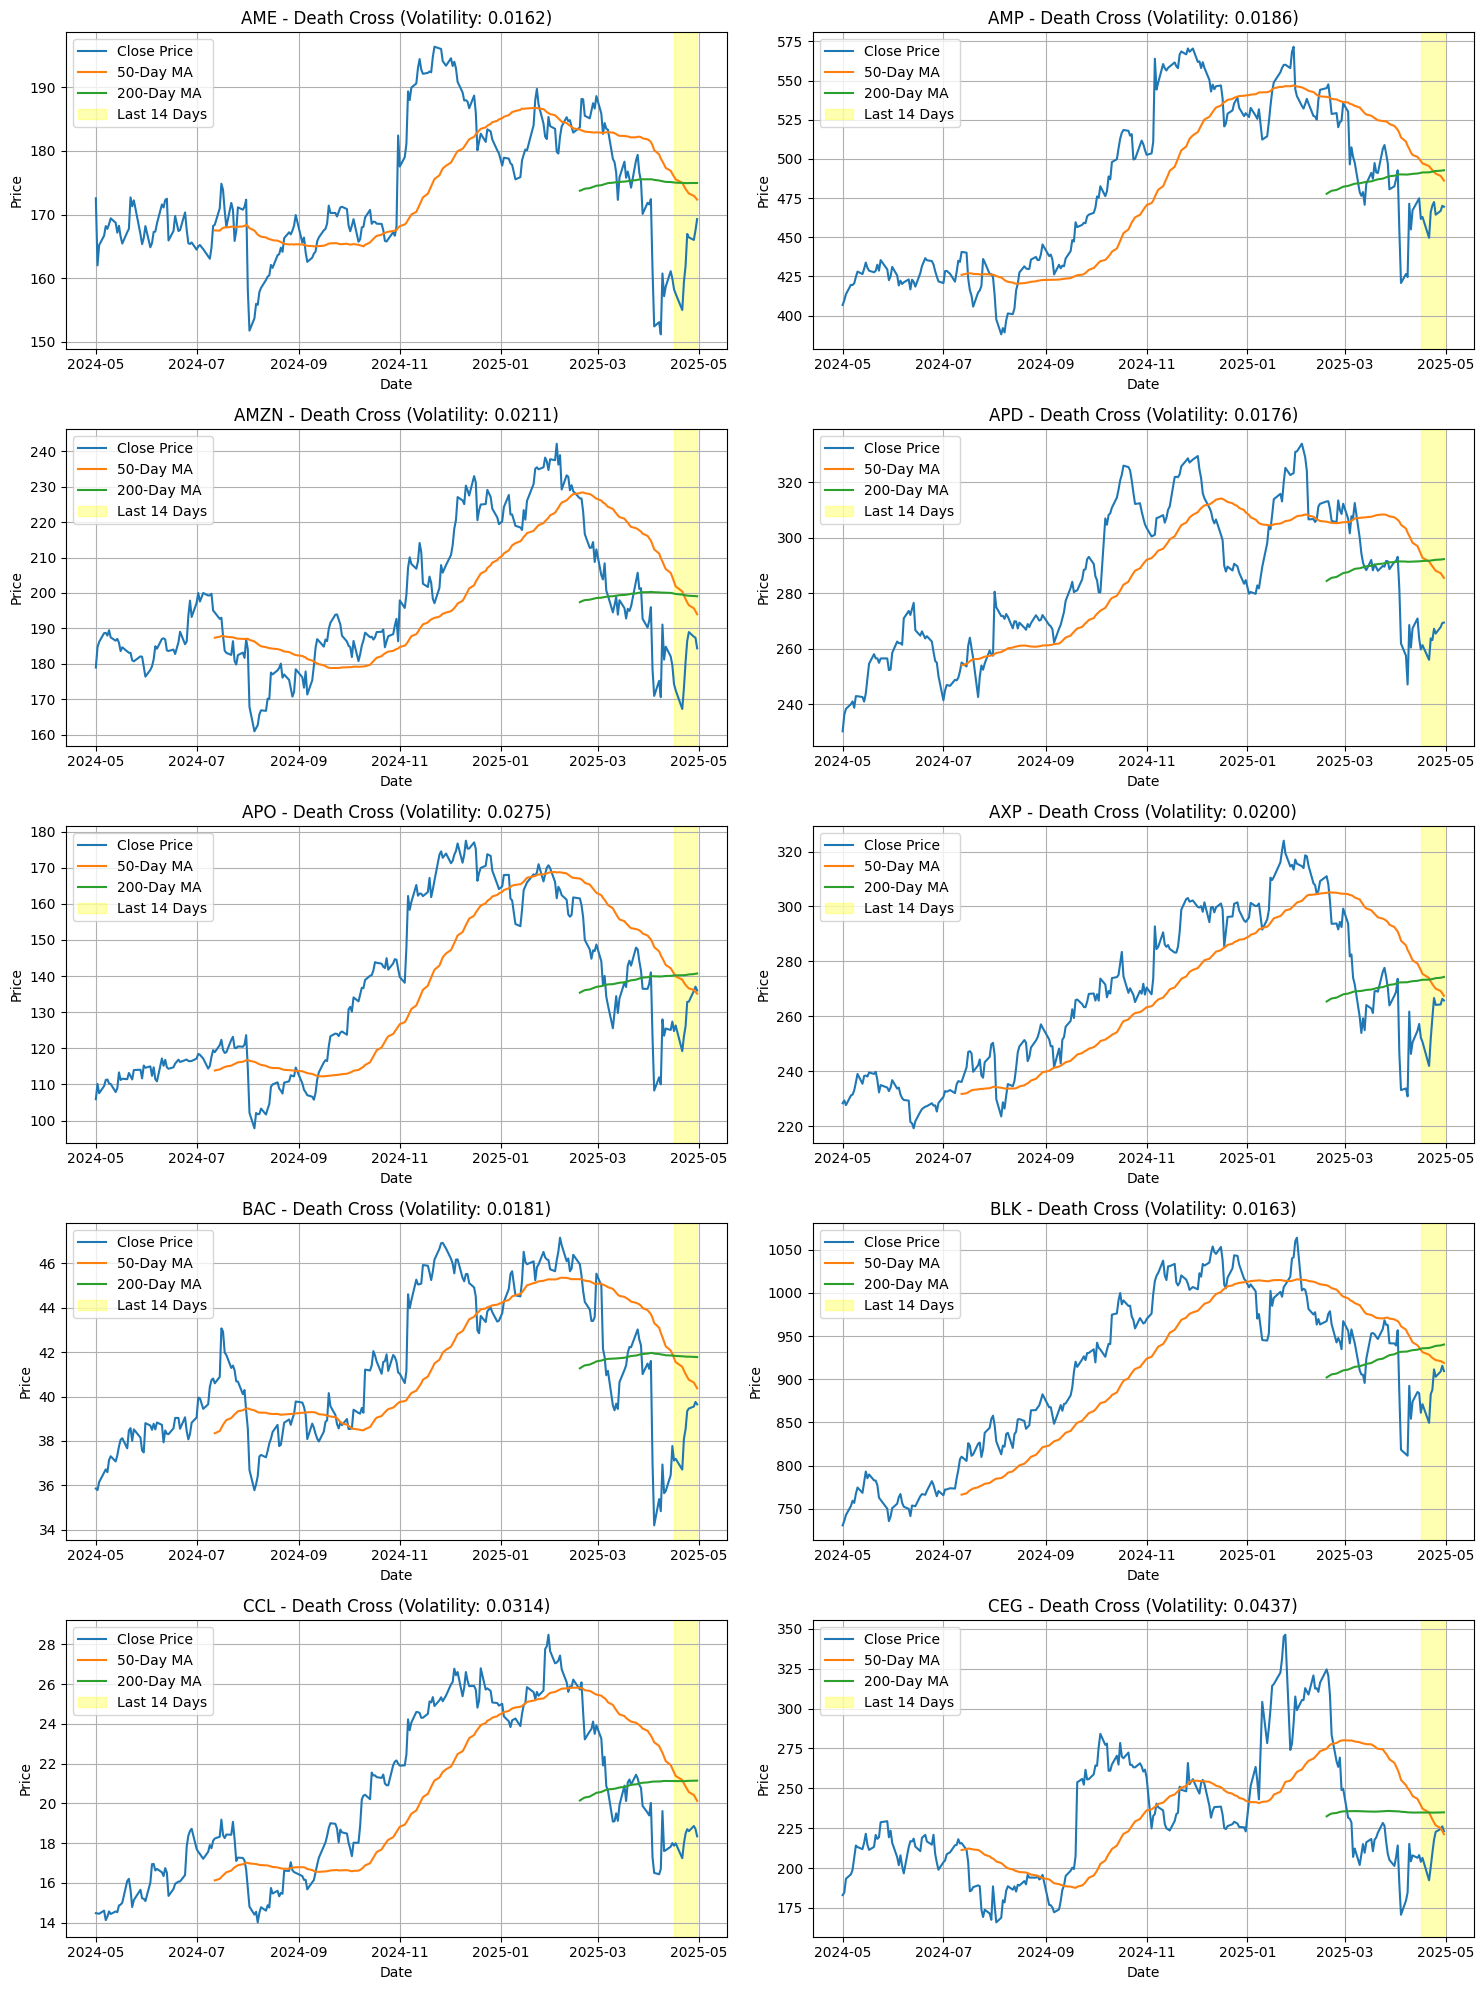

In [57]:
# CODE HERE
# Visualize the results here

death_cross_tickers = sorted(df_death_cross_14d.keys())[:10]

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, ticker in enumerate(death_cross_tickers):
    axes[i].plot(df_close[ticker], label='Close Price')
    axes[i].plot(df_ma50[ticker], label='50-Day MA')
    axes[i].plot(df_ma200[ticker], label='200-Day MA')
    axes[i].set_title(f'{ticker} - Death Cross (Volatility: {volatility[ticker]:.4f})')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].grid(True)
    # Shade the last 14 days
    end_shade_date = df_close.index.max()
    start_shade_date = end_shade_date - pd.Timedelta(days=14)
    axes[i].axvspan(start_shade_date, end_shade_date, color='yellow', alpha=0.3, label='Last 14 Days')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

It's a visual indicator of the price of a stock that confirms a short-term moving average is crossing over a long-term moving average to the upside. This means the price of the stock has an increasing trend,so it's a good sign to buy (long-term bull market ahead).


#### What is a Death Cross and how might market participants react to it?

This is the opposite of the golden cross, since the price trend is going downwards. The short-term moving average trends down and crosses the long-term moving average. (Bear market ahead)
The marker participants may start to sell their stock since the price can keep going down. They can also keep monitoring the price until they think it has reached the bottom and start buying cheap stock.
This information could also be used to enter short positions, to profit on the stock price going down.



#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

The moving averages show the trend of a stock price, and they help smoothing out the short-term volatility, making it easier to see the overall direction of the price.



#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

To identify the latest trend and be able to "predict" the price in the following days. If we were to use more days in the past, the crossing trend may not be the latest.
It is short enough to react to recent price changes and long enough to filter out random daily noise.



#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

It helps in determining if a crossover is meaningful or a false signal.
*   If the volatility is low, it indicates less noise,
and is more likely to indicate a real trend shift.
*   If it's high or inconsistent, the trend is not very clear.
*   If it's gradually increasing, it can confirm the direction of the trend.


### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

Look for a golden cross in the past and simulate a trade the next day. Define how long to hold on to this stock, it can be until the death cross or a specific timeframe and analyze the profit. Do this for several tickers and compare.

#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

You're not getting a complete picture of the analyzed stock. There can be a lot of events that can affect the price outside of the technical indicators, such as important news, earnings, changes in regulations, global events (like Covid-19).
The technical indicators don't tell you if a stock is under or overvalued either.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

Combine with fundamental analysis.
Establish a limit of how much the price needs to cross the long-term moving average before it's considered a golden cross.
Include an indicator to visualize the volume of the stock too.
Include a low volatility monitoring into the calculation of the golden cross.
Use a time delay strategy to ensure that the price is maintained over the golden cross.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Yes, since they include some external factors that the technical indicators don't.


### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

No. It lacks of market context.


#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

Not really, we saw different cases where the prices went down again regardless of the volatility.


#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:
*   Golden crosses alone are not sufficient for actionable trading.
*   This approach needs to be used in combination of some other strategies, not as a standalone signal.


Caveats in 2 or 3 bullet points:
*   Technical analysis doesn't include any external factors.
*   Validate volume, momentum and market context before making any trade decisions.

